# Simulate sounding from ERA5 for plotting Skew-T/LogP and instability indices 
* เนื่องจากวันที่เกิดเหตุการณ์พายุลูกเห็บที่เชียงของ ไม่มีข้อมูลตรวจอกาาศช้นบน จากสถานีเชียงใหม่ จึงต้องใช้ข้อมูลจากแบบจำลอง era 5 hourly โดยดูวิธีการและโค้ดจาก https://www.youtube.com/watch?v=C3YwOG8btMk เพื่อที่จะนำไปพลอตใน sharppy
* เชียงรายไม่มีการตรวจวัดสภาพอากาศชั้นบน มีแต่เชียงใหม่ แต่ก็ไม่ได้มีทุกวัน ให้ดูรายชื่อรหัสสถานีตรวจอากาศจากรายงาน wmo ได้ที่ลิงก์  https://library.wmo.int/doc_num.php?explnum_id=9896
* พิกัดภูมิศาสตร์ใช้บริเวณสถานีเรดาร์ จังหวัดเชียงราย ได้มาจากกุเกิ้ล https://goo.gl/maps/uQB3Vx4HLPK8HLxb8
* ลงโปรแกรม sharppy binary https://github.com/skovic/SHARPpy/releases/tag/v1.4.0-fixed
* ข้อมูล ERA5 hourly https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels?tab=overview


# การใช้งาน
* 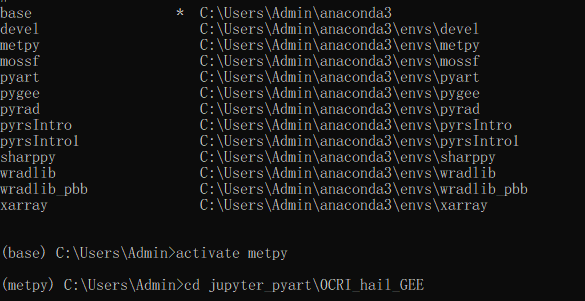


## ดาวน์โหลดข้อมูล era5 hourly วันที่ 20-23/04/2020 เวลา 0000UTC
* เนื่องจากอยากวิเคราะห์เวลา 0700 Local time ซึ่งเป็นเวลามาตรฐานของ WMO ในการปล่อย souding
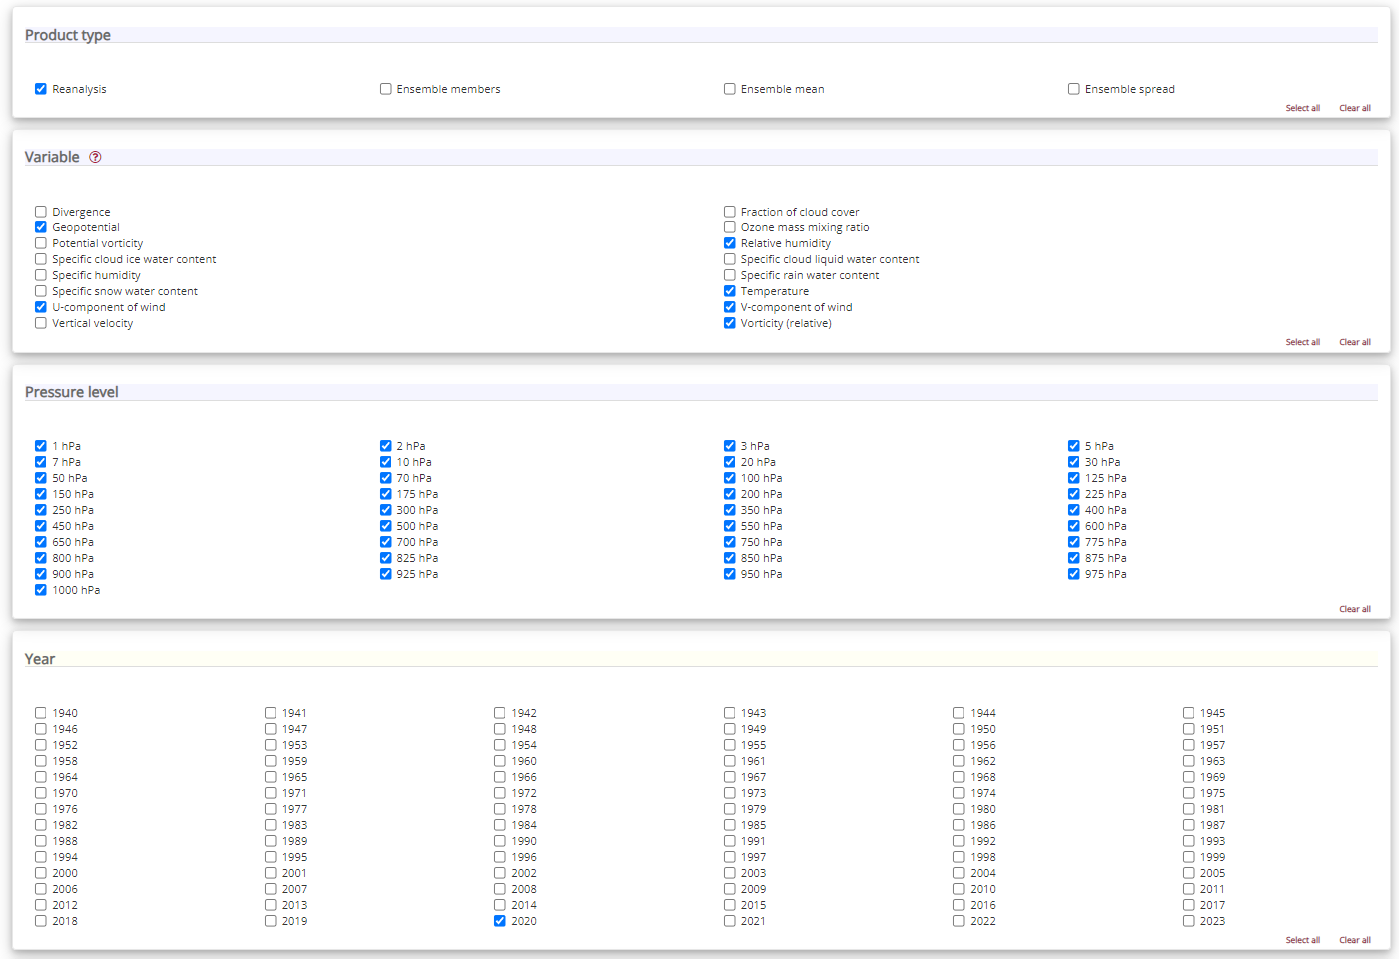

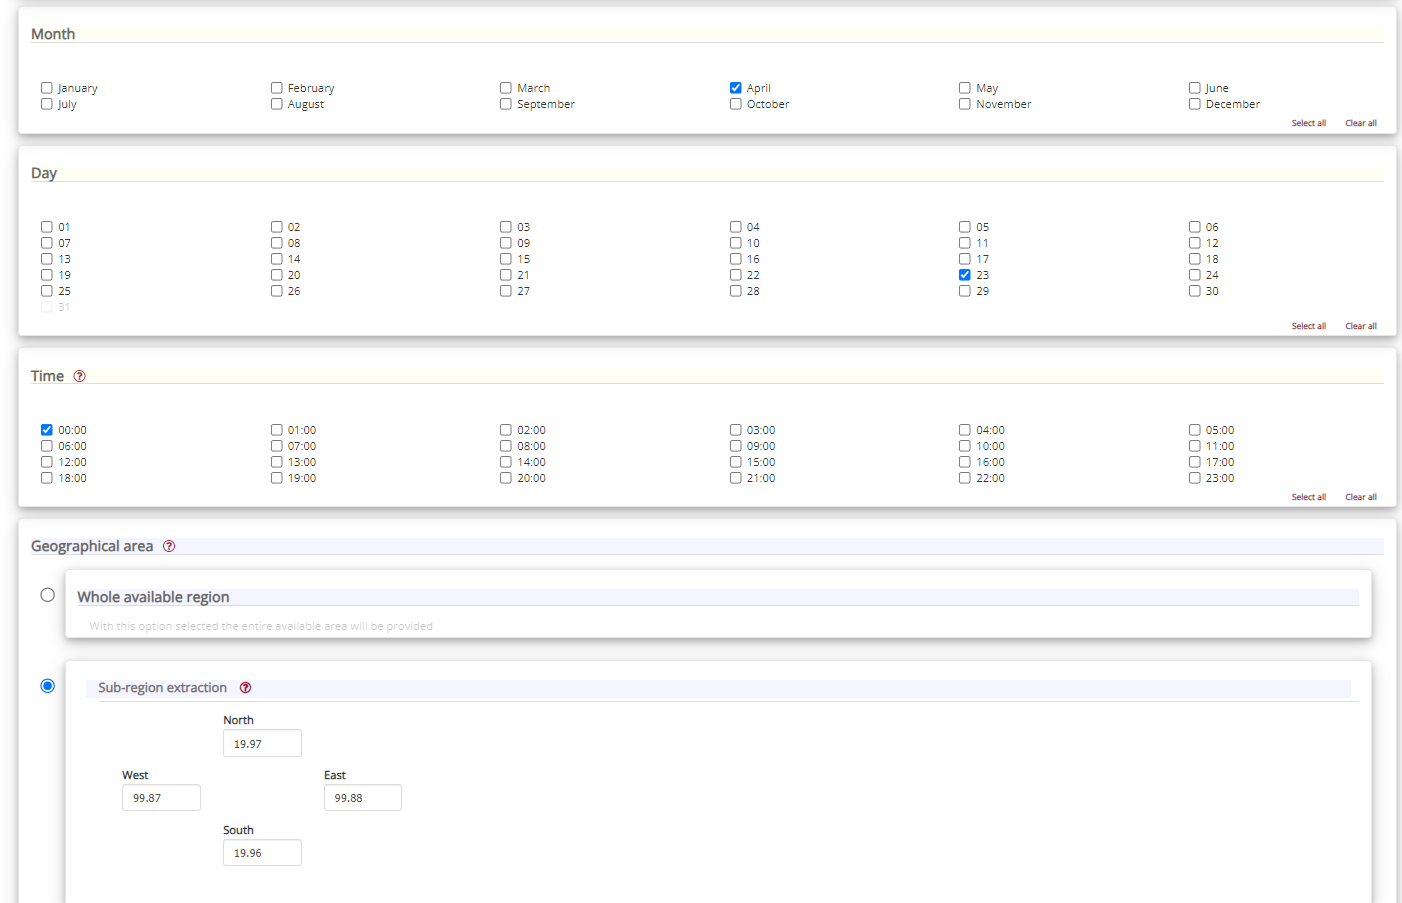
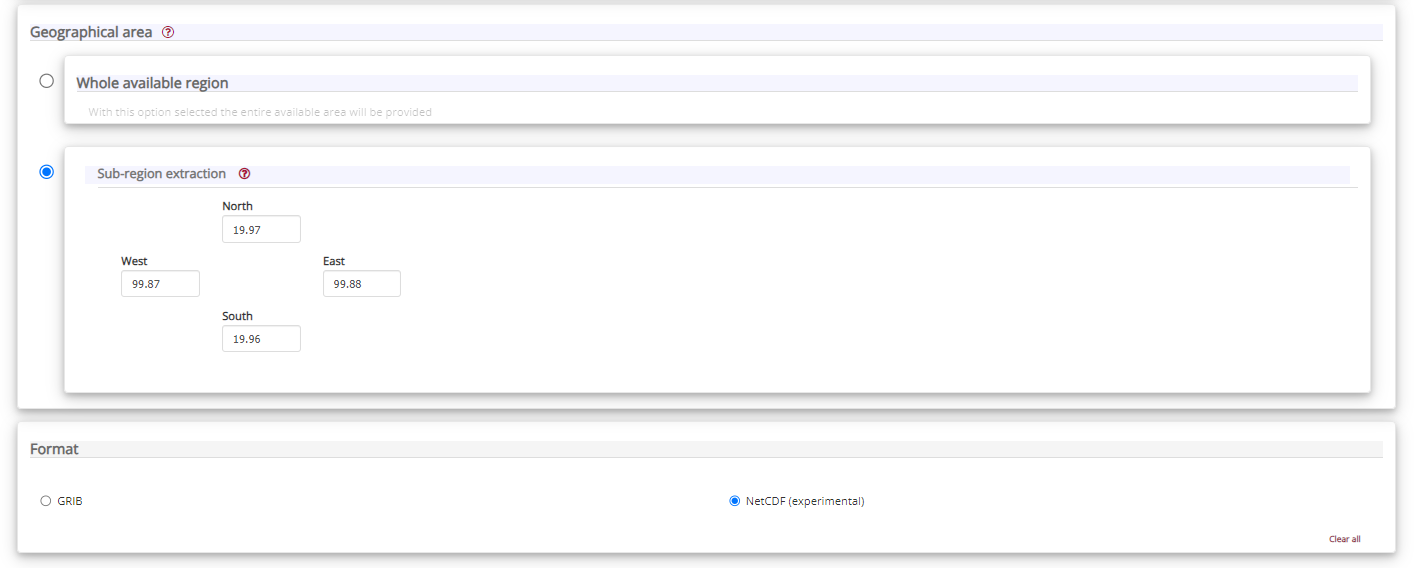

* ใช้ค่าพิกัดสถานีเรดาร์ จ.เชียงราย  ที่ได้จากกุเกิ้ล
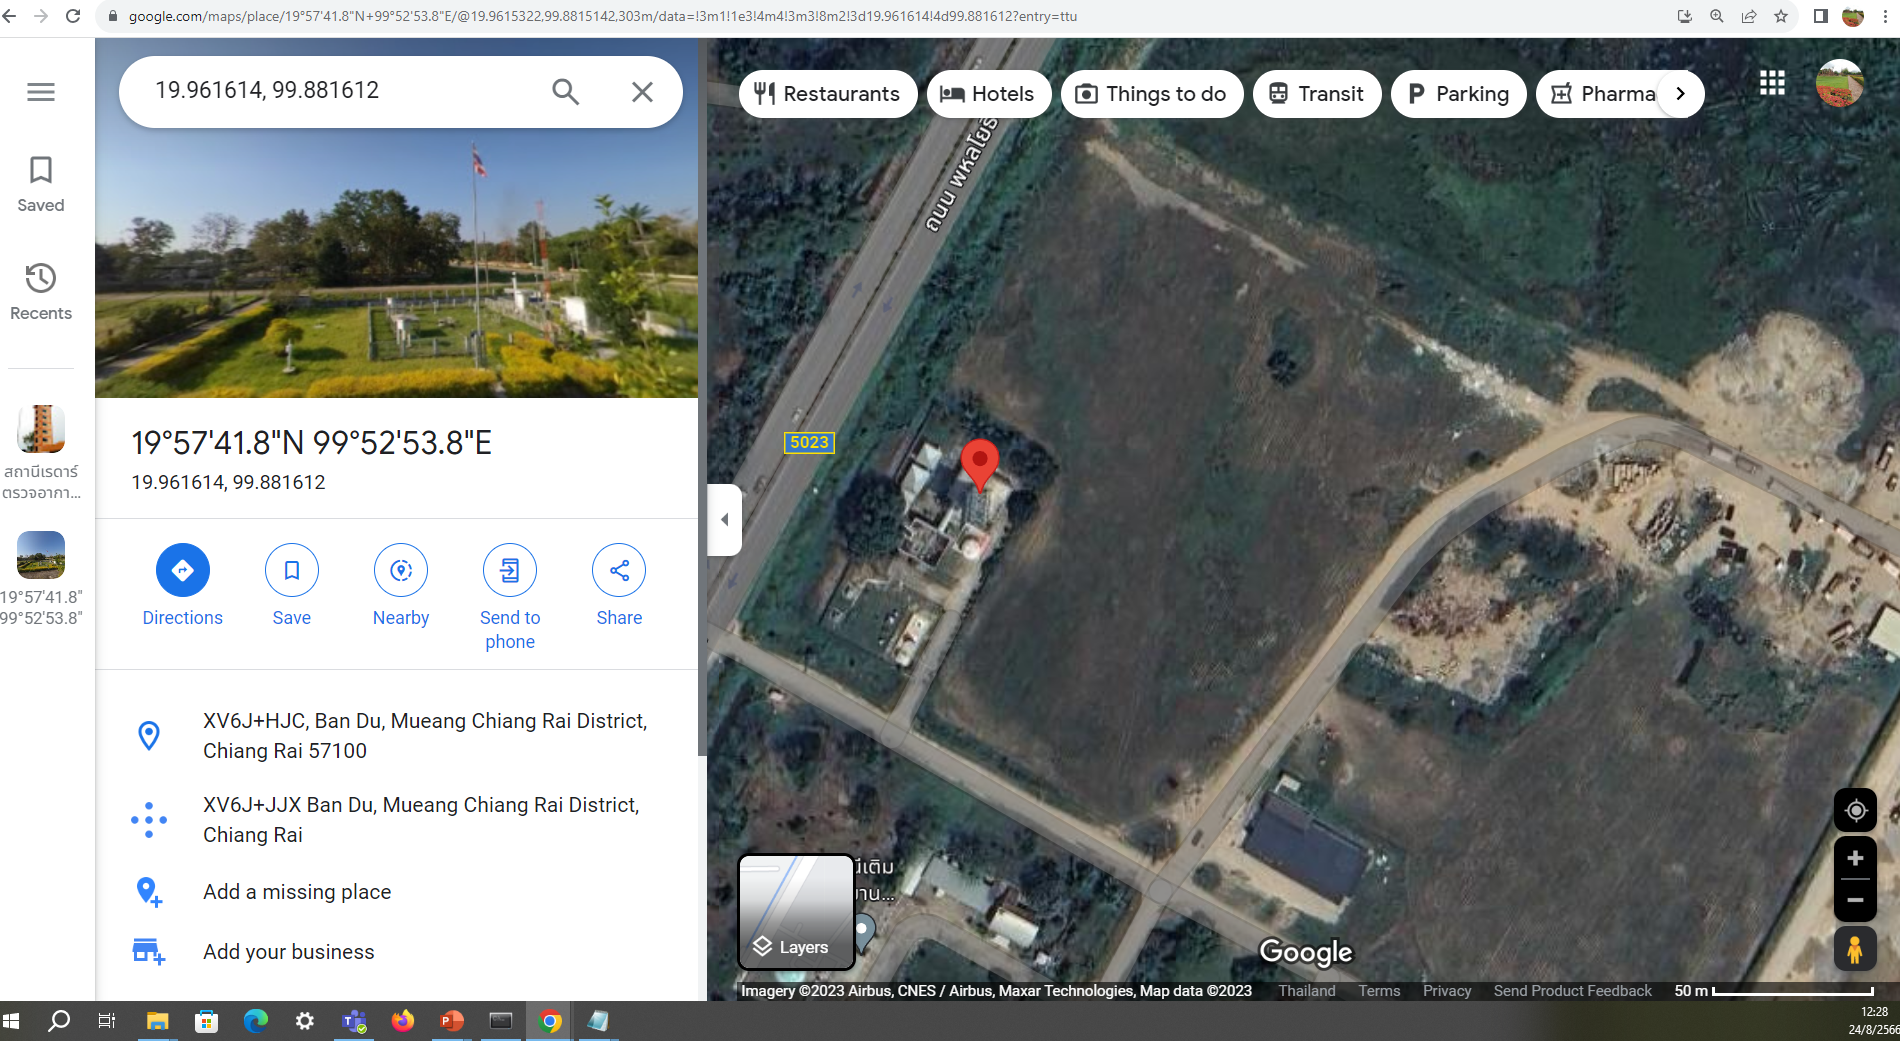


## โค้ดสกัดค่า reanalysis ตามพิกัดที่ต้องการ

In [1]:
from netCDF4 import Dataset
from metpy import calc
from metpy.units import units
import numpy as np

In [2]:
from metpy.calc import equivalent_potential_temperature

# ต้องการคำนวณค่า 3 คอลัมน์สุดท้าย เพื่อให้ได้ตามฟอร์แมท wyoming
ตามลิงก์นี้ https://weather.uwyo.edu/upperair/columns.html
* THTA:	Potential Temperature	[kelvin]
* THTE:	Equivalent Potential Temperature	[kelvin]
* THTV:	Virtual Potential Temperature	[kelvin]

แต่ยังมีค่าที่เรายังไม่มีอีก ต้องหาทางคำนวณ หรือ ดาวน์โหลดค่ามา
* FRPT:	Frost Point Temperature	[celsius]
* RELI:	Relative Humidity with respect to Ice	[%]
* MIXR:	Mixing Ratio	[gram/kilogram]

## อ่านค่าแบบจำลองที่สกัดมาได้

In [3]:
ds = Dataset('./0data/0reanalysisData/era5_00utc_23apr_2020_radarStation.nc')
lat = ds['latitude'][:]
lon = ds['longitude'][:]

## หาตำแหน่งที่ใกล้กับตำแหน่งที่ต้องการของหาดไคร้

In [4]:
c_x, c_y = 19.961614, 99.881612
x, y = np.abs(lat - c_x).argmin(), np.abs(lon + c_y).argmin()

## คำนวณค่าตัวแปรอุตุ

In [5]:
date=0 #0=20, 1=21, 2=22, 3=23 apr
levels = ds['level'][:]
z = ds['z'][date, :, y, x] / 9.81
u = ds['u'][date, :, y, x]
v = ds['v'][date, :, y, x]
temp = ds['t'][date, :, y, x] - 273.15
rh = ds['r'][date, :, y, x]

## 	Dewpoint Temperature

In [6]:
DWPT = np.asarray(calc.dewpoint_from_relative_humidity(np.asarray(temp) * units.degC, np.asarray(rh) * units.percent))
DWPT

array([-106.26761203, -105.66984028, -100.0747363 ,  -98.94843347,
        -96.86675005,  -95.29816614,  -91.07792004,  -88.86694236,
        -85.98252533,  -83.86508963,  -81.4495656 ,  -78.88331591,
        -73.36907373,  -65.85110081,  -54.42557633,  -48.13794801,
        -44.54902652,  -39.78842255,  -34.14232601,  -27.41287764,
        -23.87916879,  -15.11436834,  -10.07893552,   -8.15792973,
         -1.17856184,    3.49586509,    5.93469069,    6.57872236,
          7.45571128,    8.75864241,   10.64279879,   13.6817146 ,
         15.91071446,   16.94376681,   18.08420846,   19.17216788,
         20.56009808])

## Wind Direction

In [7]:
DRCT = np.degrees(np.arctan2(u ,v)) + 180
DRCT

masked_array(data=[277.8319857562623, 279.0060488770937,
                   261.3247785237045, 167.89905582956592,
                   138.41196225943767, 191.69295689863338,
                   83.93974046297599, 96.42858880607369,
                   15.751189372868708, 284.79513638770806,
                   248.47262347684716, 259.69957900262693,
                   237.84474840872156, 228.56097026819225,
                   226.46472705367603, 223.04557057292988,
                   230.1835654046402, 235.10600377714283,
                   244.38440104321197, 251.22085077154023,
                   258.48984734570917, 261.810261742017,
                   260.17608034695155, 254.08778071421506,
                   238.08216945740904, 237.80758779466598,
                   265.30054463787803, 269.464084154038,
                   259.6155218387524, 233.48288943147074,
                   209.70959921651013, 193.706284772658,
                   178.52271695251102, 165.8298246676175,
           

## Wind Speed

In [8]:
wspd = np.hypot(u, v) * 1.944
wspd #หน่วยยังเป็น m/s  อ่านเอกสารของ ERA5 ที่ https://apps.ecmwf.int/codes/grib/param-db/?id=131


masked_array(data=[ 6.05672795, 27.59666745, 30.82299941,  3.80337   ,
                    6.09427229,  2.42844184, 27.62453366, 22.58487562,
                    8.8664332 , 16.09322002, 33.86620236, 46.3076691 ,
                   53.3286483 , 67.04814126, 80.20763203, 78.99654036,
                   71.95472092, 51.71591135, 45.54914509, 42.72071745,
                   38.84607277, 38.7553514 , 32.13170662, 26.09681589,
                   20.29364986, 13.75795928,  9.98193163,  9.16489465,
                    8.32359397,  9.26062307, 13.16925221, 17.80801745,
                   17.49782802, 12.21216055,  4.52150474,  1.7216381 ,
                    1.66504221],
             mask=False,
       fill_value=1e+20)

### แปลง หน่วยจาก m/s ไปเป็น knot ตามฟอร์แมทของ wyoming https://weather.uwyo.edu/upperair/columns.html

In [9]:
SKNT = (np.asarray(wspd) * units('m/s')).to(units.knot)
SKNT = np.asarray(SKNT) 

# Relative Humidity

In [10]:
RELH = np.asarray(rh) * units.percent
RELH = np.asarray(RELH) 
RELH

array([3.04867979e-04, 3.04867979e-04, 1.88825916e-03, 9.80521505e-03,
       2.40557357e-02, 4.62232121e-02, 2.74231542e-01, 7.96750631e-01,
       3.10691836e+00, 2.51556405e+01, 5.81614296e+01, 2.48088778e+01,
       2.36846701e+01, 3.97244227e+01, 1.03764679e+02, 1.01253421e+02,
       8.63901276e+01, 5.57372577e+01, 4.09578845e+01, 4.12207274e+01,
       3.67824819e+01, 5.68741326e+01, 6.23542495e+01, 5.09696669e+01,
       6.35797942e+01, 6.70426707e+01, 5.94202256e+01, 5.32687509e+01,
       4.89809276e+01, 4.74276208e+01, 4.92817719e+01, 5.72541465e+01,
       6.39091396e+01, 6.26693443e+01, 6.12442923e+01, 6.03512596e+01,
       6.04351794e+01])

# ข้อสังเกต ความชื้นสัมพัทธ์ ต่ำมาก ๆ 

# Potential Temperature
คำนวณจากวิธี https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.potential_temperature.html#examples-using-metpy-calc-potential-temperature

In [11]:
# แปลงหน่วยอุณหภูมิเพื่อคำนวณค่า PT
T_k = ((np.asarray(temp)) + 273.15) * units.kelvin

In [12]:
THTA = calc.potential_temperature(np.asarray(levels) * units.hPa, np.asarray(T_k) *  units.kelvin) 
THTA = np.asarray(THTA) 

# Equivalent Potential Temperature
ใช้วิธีในการคำนวณจาก https://unidata.github.io/MetPy/dev/examples/calculations/Equivalent_Potential_Temperature.html

In [13]:
THTE = calc.equivalent_potential_temperature(np.asarray(levels) * units.hPa, np.asarray(temp) * units.degC, np.asarray(DWPT) * units.degC)
THTE = np.asarray(THTE) 

# Virtual Potential Temperature
* คำนวณค่า mixing ratio ก่อน ด้วยการใช้ pressure, temperature และ relative humidity จากลิงก์ https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.mixing_ratio_from_relative_humidity.html
* คำนวณค่า Virtual Potential Temperature จากลิงก์ https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.virtual_potential_temperature.html

## หา mixing ratio

In [14]:
MIXR = calc.mixing_ratio_from_relative_humidity(np.asarray(levels) * units.hPa, np.asarray(temp) * units.degC, np.asarray(rh) * units.percent) * units('g/kg')
MIXR = np.asarray(MIXR) *1000.0 # เอา 1000 ไปคูณจะกลายเป็นหน่วยกรัม

## หา Virtual Potential Temperature

In [15]:
THTV = calc.virtual_potential_temperature(np.asarray(levels) * units.hPa, np.asarray(temp) * units.degC, np.asarray(MIXR)  * units('g/kg'))
THTV = np.asarray(THTV)

## บันทึกข้อมูล sounding ให้อยู่ในฟอร์แมทของ wyomming

In [16]:
with open('./0output/0reanalysisData/era5_23042020_0000utc_wyoming.txt', 'w', encoding = 'utf-8') as f:
    f.write(f"48303 VTCC Chiang Rai ERA5 Simulated at 00z 23 Apr 2020\n\n")
    f.write(f"-----------------------------------------------------------------------------\n")
    f.write(f"   PRES   HGHT   TEMP   DWPT   RELH   MIXR   DRCT   SKNT   THTA   THTE   THTV\n")
    f.write(f"    hPa     m      C      C      %    g/kg    deg   knot     K      K      K \n")
    f.write(f"-----------------------------------------------------------------------------\n")
    

    for i in reversed(range(len(levels))):
        f.write(f"{levels[i]:>7.1f}{z[i]:>7.0f}{temp[i]:7.2f}{DWPT[i]:7.2f}{rh[i]:7.0f}{MIXR[i]:7.2f}{DRCT[i]:7.0f}{SKNT[i]:7.0f}{THTA[i]:7.1f}{THTE[i]:7.1f}{THTV[i]:7.1f}\n") #ok
        #f.write("%.1f\n" %levels[i]) #ok
        #f.write(f"{levels[i]:.1f}\t{z[i]:5.1f}\t{temp[i]:3.1f}\t{DWPT[i]:3.1f}\t{rh[i]:3.1f}\t{MIXR[i]:3.4f}\t{DRCT[i]:3.1f}\t{SKNT[i]:3.1f}\t{THTA[i]:4.1f}\t{THTE[i]:4.1f}\t{THTV[i]:4.1f}\t\n")

    f.write('Station information and sounding indices')
    

# ผลที่ได้

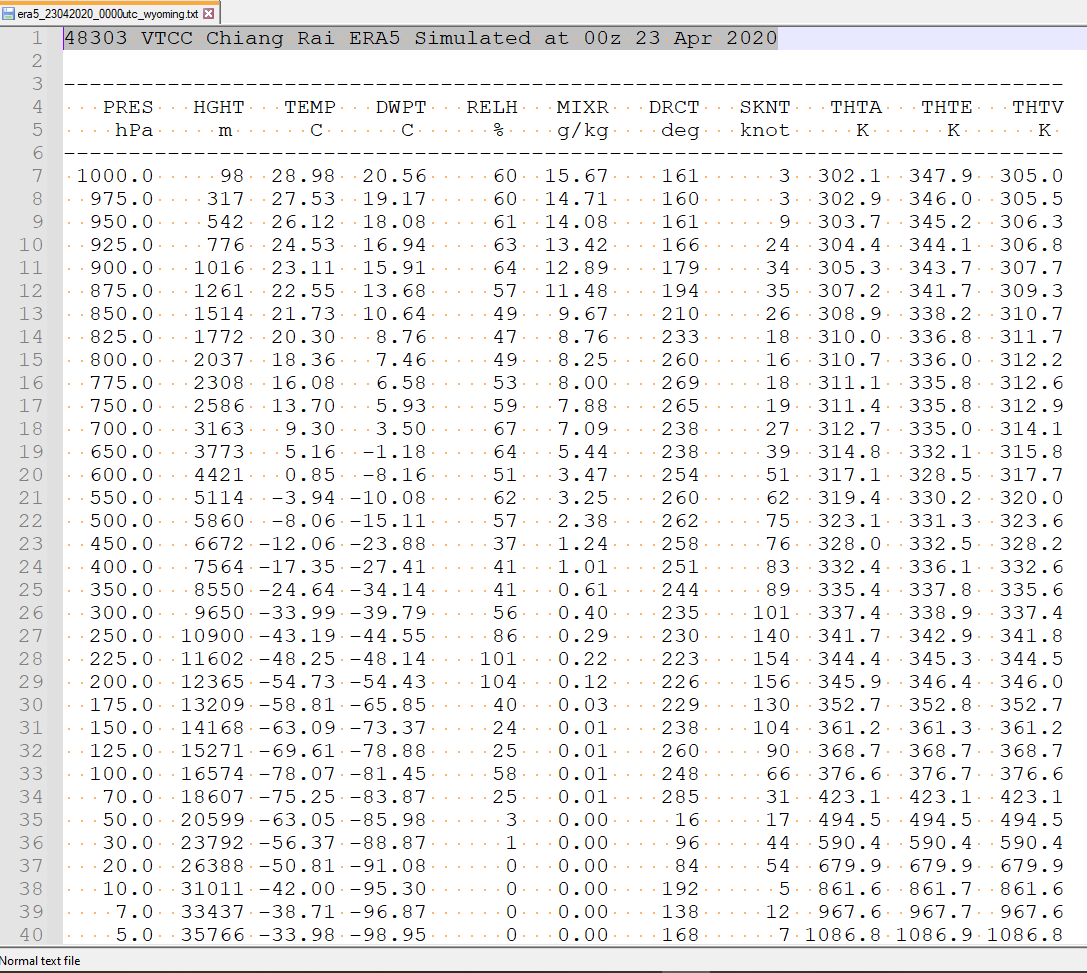